# Importing Libraries

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

## Importing the "Clustering_Ensemble" package

In [ ]:
def download_clustering_ensemble_algorithme():

    clustering_Ensemble_file = open("Clustering_Ensemble.py", "w")
    clusteringNormalizedCuts = open("ClusteringNormalizedCuts.py", "w")
    
    url1 = "https://raw.githubusercontent.com/Yanis2016/Clustering-Ensemble/master/Clustering_Ensemble.py"
    url2 = "https://raw.githubusercontent.com/Yanis2016/Clustering-Ensemble/master/ClusteringNormalizedCuts.py"

    clustering_Ensemble_file.write(requests.get(url1).text)
    clusteringNormalizedCuts.write(requests.get(url2).text)
    clustering_Ensemble_file.close()
    
    print("the download was successful.")

download_clustering_ensemble_algorithme()

the download was successful.


In [ ]:
# Import the model
from Clustering_Ensemble import CluterEnsemble

# View Documentation
help(CluterEnsemble)

Help on class CluterEnsemble in module Clustering_Ensemble:

class CluterEnsemble(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, n_clusters=4, n_partitions=1000, max_iter=4, k_type='Fixed', cons_validation='ac', m=3, alpha=0.5)
 |      Clustering Ensemble.
 |      
 |      Operating principle:
 |      ---------
 |          1 - generalization of several partitions using the K Means algorithm with k 
 |              varies between 2 and sqrt (n_sample).
 |      
 |          2 - update of the co-association matrix.
 |      
 |          3 - generation of partitions by applying the clustering algorithm based on normalized cuts 
 |              on the co_assiation matrix when the negative proof is removed.
 |      
 |          4 - selection of the final score with a higher degree of confidence.
 |      
 |      Parameters
 |      ----------
 |      n_cluters : int, default=4
 |          The number of clusters.
 |      
 |      n_partitions : int, default=1000
 |          

## Test the model on the iris data, and compare it with the KMeans

In [ ]:
# Importing iris data
iris = pd.DataFrame(datasets.load_iris()["data"], columns=datasets.load_iris()["feature_names"]).join(pd.DataFrame(datasets.load_iris()["target"], columns=["target"]).astype("category"))

# Display the dimensions of the dataframe
print(f"Dimesions:\n\trow : {iris.shape[0]}\n\tcol : {iris.shape[1]}\n")

# Display the first 5 lines of the dataframe
iris.head()


Dimesions:
	row : 150
	col : 5



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


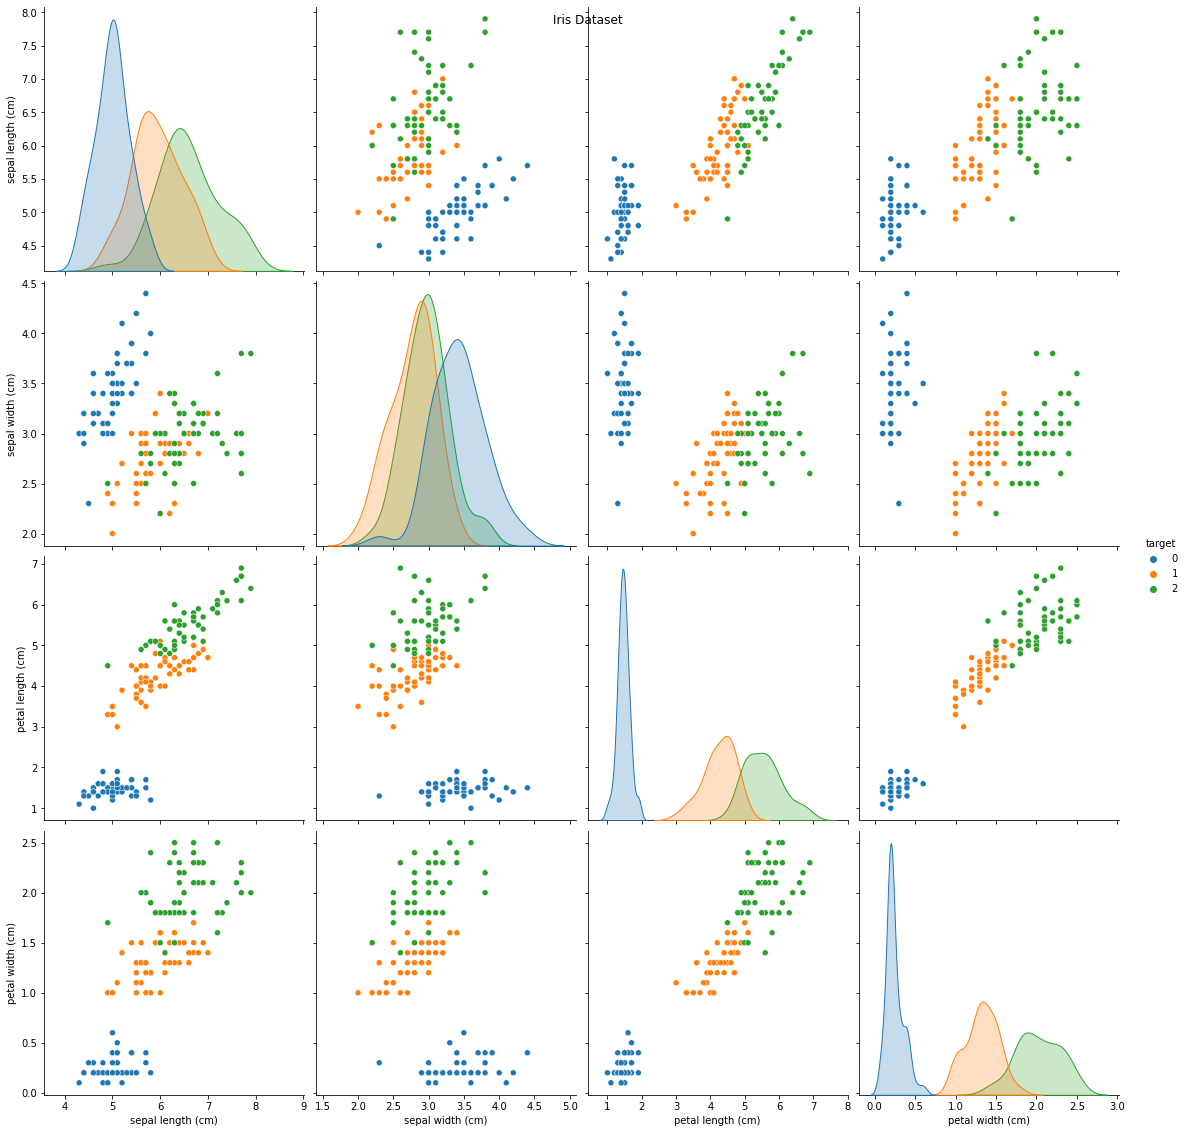

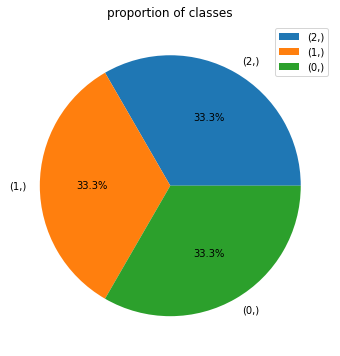

In [ ]:
# Data visualization
sns.pairplot(iris, hue="target", height=4).fig.suptitle("Iris Dataset")
plt.show()

# Display the proportion of class
pd.DataFrame(iris.target).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="proportion of classes")
plt.legend()
plt.show()

In [ ]:
# Initialize and train the kmean model
kmean = KMeans(n_clusters=3).fit(iris.drop(columns=["target"]))

# Recover mabel calculated by kmean
pred_kmean = kmean.labels_

# Evaluate the results of the kmean
print("Kmean score :", adjusted_mutual_info_score(iris.target, pred_kmean))

Kmean score : 0.7551191675800484


clustering_ensemble score : 0.8032287370935434


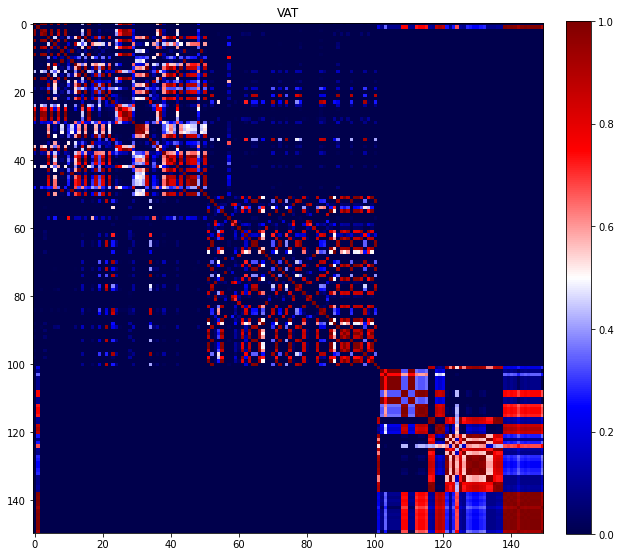

In [ ]:
# Initialize and train the clustering_ensemble model
ens_clust = CluterEnsemble(n_clusters=3).fit(iris.drop(columns=["target"]))

# Recover mabel calculated by clustering_ensemble
pred_ens_clust = ens_clust.labels

# Evaluate the results of clustering_ensemble
print("clustering_ensemble score :", adjusted_mutual_info_score(iris.target, pred_ens_clust))

# Display the co-association matrix
ens_clust.draw_vat()

The co-association matrix allows us to determine the number of existing clusters in the data, so you can first run the model with a random number of cluster number, then view the “VAT” matrix, in order to estimate the number of cluster.

The clustering ensemble model is used in cases where we cannot visualize the data, so we cannot know which of the existing models to choose in order to detect the underlying structures existing in the data, moreover this algorithm is tested on 16 different data types (text, numeriq, images ... ect) and always gives good results